# 2장. 사전과정과 최적화

## 2.1. 실수자료로의 전환(vectorization)

In [1]:
# 범주형 자료의 수량화
x = ({'city': 'Seoul', 'temp': 10.0}, {'city': 'Dubai', 'temp': 33.5}, {'city': 'LA', 'temp': 20.0})
x

({'city': 'Seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 33.5},
 {'city': 'LA', 'temp': 20.0})

In [2]:
from sklearn.feature_extraction import DictVectorizer

vec1 = DictVectorizer(sparse=False)
vec1.fit_transform(x)  # x를 범주형 수량화 자료로 변환

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [3]:
# vec1 = DictVectorizer()  # 메모리를 줄이기 위해 sparse=True
x1 = vec1.fit_transform(x)
x1

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [4]:
vec1.get_feature_names()

['city=Dubai', 'city=LA', 'city=Seoul', 'temp']

---

In [5]:
text = ['떴다 떴다 비행기 날아라 날아라',
       '높이 높이 날아라 우리 비행기',
       '내가 만든 비행기 날아라 날아라',
       '멀리 멀리 날아라 우리 비행기']
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vec2 = CountVectorizer()
t = vec2.fit_transform(text).toarray()  # text를 수량화 배열 자료로 변환

import pandas as pd

t1 = pd.DataFrame(t, columns=vec2.get_feature_names())
t1

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [7]:
# Term Frequency Inverse Document Frequency

from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer()

x2 = tfid.fit_transform(text).toarray()
x3 = pd.DataFrame(x2, columns=tfid.get_feature_names())
x3

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


---

* 표준화

  $\displaystyle \mathbf{x}_{std} = \frac{\mathbf{x} - \text{mean}\left(\mathbf{x}\right)}{\text{sd}\left( \mathbf{x} \right)}$

$~$
* 정규화

  $\displaystyle \mathbf{x}_{nor} = \frac{\mathbf{x} - \text{min}\left( \mathbf{x}\right)}{\text{max}\left( \mathbf{x}\right) - \text{min}\left( \mathbf{x}\right)}$

---

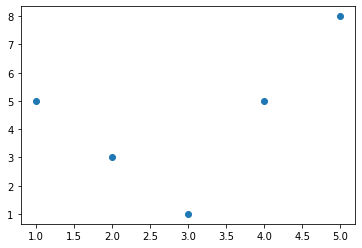

In [8]:
# 특성변수 생성

import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 3, 1, 5, 8])

plt.plot(x, y, 'o')  # 선형회귀를 하기에는 부적합
plt.show()

---

In [9]:
from sklearn.preprocessing import PolynomialFeatures

fg = PolynomialFeatures(degree=3, include_bias=True)  # include_bias는 절편항 여부
x1 = fg.fit_transform(x[:, np.newaxis])  # 3차까지 생성
x1

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

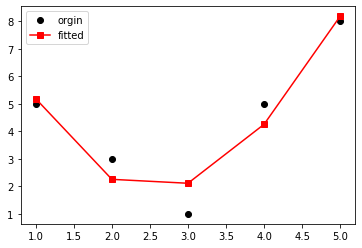

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x1, y)

yfit = reg.predict(x1)  # 적합 값

plt.plot(x, y, 'ko', label='orgin')
plt.plot(x, yfit, 'rs-', label='fitted')
plt.legend(loc='best')

plt.show()

---

In [11]:
# 결칙자료 대체
x_miss = np.array([[1, 2, 3, None], [5, np.NaN, 7, 8], [None, 10, 11, 12], [13, np.nan, 15, 16]])
x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [12]:
from sklearn.impute import SimpleImputer

im = SimpleImputer(strategy='mean')
im.fit_transform(x_miss)  # 열의 평균값으로 대체

array([[ 1.        ,  2.        ,  3.        , 12.        ],
       [ 5.        ,  6.        ,  7.        ,  8.        ],
       [ 6.33333333, 10.        , 11.        , 12.        ],
       [13.        ,  6.        , 15.        , 16.        ]])

---

In [13]:
# pipeline library를 이용한 결측 자료 대체 및 특성변수 생성
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

y = pd.Series([2, 5, 1, 6])

model = make_pipeline(SimpleImputer(strategy='mean'), 
                      PolynomialFeatures(degree=2),
                      LinearRegression())
model.fit(x_miss, y)
model.predict(x_miss)  # 이 자료에서는 관측치는 4개, 특성변수 14개로 완전 적합됨

array([2., 5., 1., 6.])

## 2.2. 자료의 특성

## 2.3. 사례분석

* [rossmann-store-sales](https://www.kaggle.com/c/rossmann-store-sales/data)

In [14]:
import pandas as pd

df1 = pd.read_csv('./rossmann-store-sales/train.csv', engine='python')
df1.shape

(1017209, 9)

In [15]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
df2 = pd.read_csv('./rossmann-store-sales/store.csv', engine='python')
df2.shape

(1115, 10)

In [17]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
df = pd.merge(df1, df2, on='Store')
df.shape

(1017209, 18)

In [19]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [20]:
print(len(df['Store'].unique()))
print(len(df['Date'].unique()))
print(df['DayOfWeek'].value_counts())

1115
942
4    145845
5    145845
3    145665
2    145664
1    144730
6    144730
7    144730
Name: DayOfWeek, dtype: int64


In [21]:
import numpy as np

df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [22]:
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week
df['Season'] = np.where(df['Month'].isin([3, 4, 5]), 'Spring',
                       np.where(df['Month'].isin([6, 7, 8]), 'Summer',
                               np.where(df['Month'].isin([9, 10, 11]), 'fall',
                                       np.where(df['Month'].isin([12, 1, 2]), 'Winter', None))))

print(df[['Date', 'Year', 'Month', 'Day', 'Week', 'Quarter', 'Season']].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>],
       [<AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>],
       [<AxesSubplot:title={'center':'Promo2SinceWeek'}>,
        <AxesSubplot:title={'center':'Promo2SinceYear'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Quarter'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Week'}>

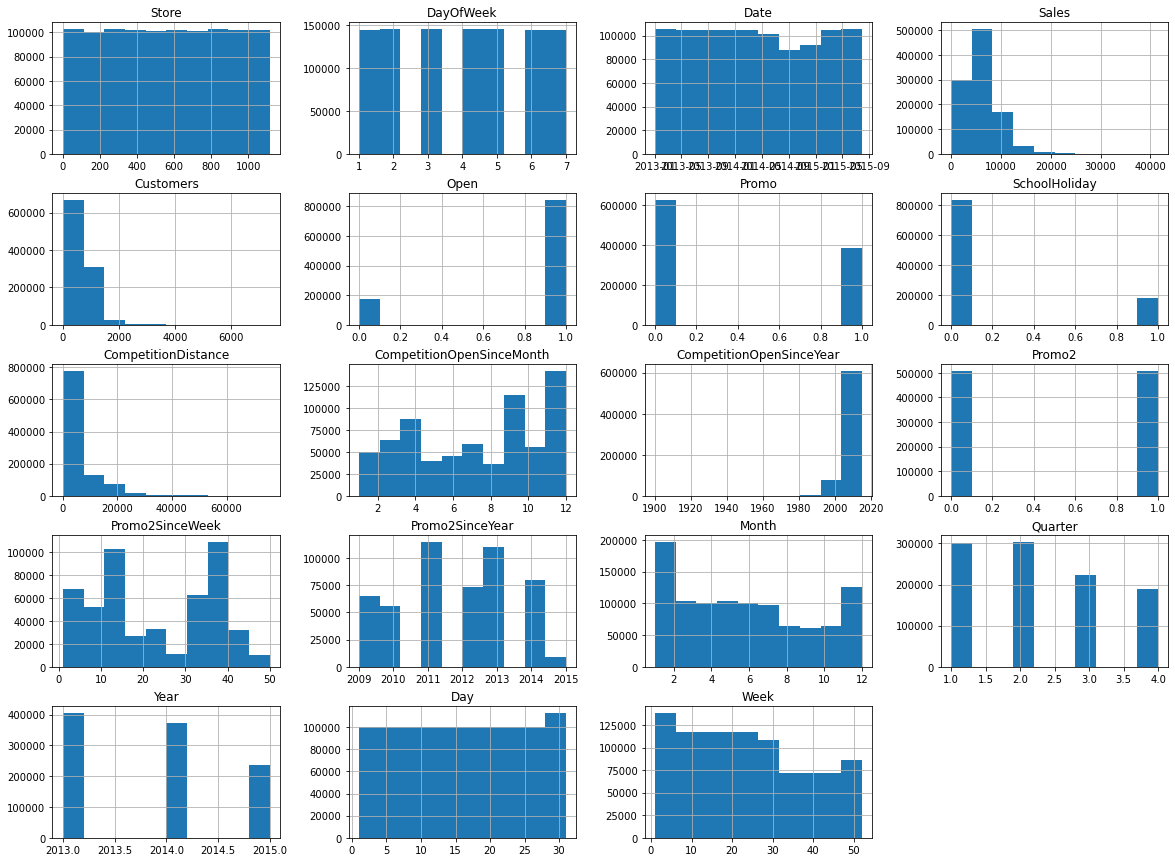

In [23]:
df.hist(figsize=(20, 15))

In [24]:
df.isnull().sum() / df.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [26]:
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].mode)
df['CompetitionDistance'].isnull().sum()

0

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

n_columns = ['Customers', 'Open', 'Promo', 'Promo2', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance']
categ_columns = ['DayOfWeek', 'Quarter', 'Month', 'Year', 'StoreType', 'Assortment', 'Season']

In [29]:
def dummy(data, col):
    lab = LabelEncoder()
    aa = lab.fit_transform(data[col]).reshape(-1, 1)
    
    ohe = OneHotEncoder(sparse=False)
    column_names = [col + '_' + str(i) for i in lab.classes_]
    
    return pd.DataFrame(ohe.fit_transform(aa), columns=column_names)

In [30]:
fdata = df[n_columns]
for column in categ_columns:
    temp_df = dummy(df, column)
    fdata = pd.concat([fdata, temp_df], axis=1)
    
fdata.head()

,Customers,Open,Promo,Promo2,StateHoliday,SchoolHoliday,CompetitionDistance,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Season_Spring,Season_Summer,Season_Winter,Season_fall
0,555,1,1,0,0,1,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,546,1,1,0,0,1,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,523,1,1,0,0,1,1270.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,560,1,1,0,0,1,1270.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,612,1,1,0,0,1,1270.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
fdata.shape

(1017209, 44)

In [32]:
fdata.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [33]:
fdata['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [34]:
fdata['StateHoliday'] = np.where(fdata['StateHoliday'] == '0', 0, 1)

## 2.4. 불균형 자료(imbalanced data)의 처리

* SMOTE(synthetic minority oversampling technique)

  $\mathbf{x}_{syn} = \mathbf{x}_i +\lambda \left( \mathbf{x}_k - \mathbf{x}_i \right)$
  
  $~$
* ADASYN(adaptive synthetic sampling method)

In [37]:
# pip install imbalanced-learn or conda install -c conda-forge imbalanced-learn
from collections import Counter
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=3, 
                           weights=[0.03, 0.07, 0.9], 
                           n_features=10, 
                           n_clusters_per_class=1, 
                           n_samples=2000, 
                           random_state=10)
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({2: 1795, 1: 141, 0: 64})


In [38]:
from imblearn.over_sampling import SMOTE, ADASYN

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({2: 1795, 1: 1795, 0: 1795})


In [39]:
ada = ADASYN(random_state=0)
X_syn, y_syn = ada.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({2: 1795, 1: 1795, 0: 1795})


## 2.5. 손실함수와 최적화(optimaization)

* 평균제곱오차(mean squared error) - 회귀 문제일 때 일반적으로 사용

  $\displaystyle \text{MSE} = \frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2$
  
$~$

* $i$번째 자료의 categorical cross entropy - 분류 문제일 때

  $\displaystyle \text{CE}_i = -\sum_{k=1}^c y_{ik} \log q_i(k)$
  
  $~$

  *  $i$번째 자료의 binary cross entropy
  
    $\displaystyle \text{CE}_i = -y_i \log q_i - (1-y_i) \log (1-q_i)$

$~$

* Categorical cross entropy

  $\displaystyle \text{CE} = \sum_{i=1}^n \text{CE}_i = -\sum_{i=1}^n \sum_{k=1}^c y_{ik} \log q_i(k)$
  
  $~$

  *  Binary cross entropy
  
    $\displaystyle \text{BE} = \sum_{i=1}^n \text{CE}_i = -\sum_{i=1}^n \left[y_i \log q_i + (1-y_i) \log (1-q_i)\right]$  

---
\begin{align*}
 y_i &= h(\mathbf{x}_i, \mathbf{w}) +\epsilon_i\\
 \\ 
 &\Big\Downarrow \;\; \epsilon = \mathcal{N}(0, \sigma^2)\\ 
 \\
 L = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} &\exp \left[-\frac{\left( y_i - h(\mathbf{x}_i, \mathbf{w}) \right)^2}{2\sigma^2} \right] \\
 &\Downarrow \\ 
 \log L = -\frac{n}{2} \log 2\pi \sigma^2 &-\frac{1}{2\sigma^2} \sum_{i=1}^n \left( y_i - h(\mathbf{x}_i, \mathbf{w}) \right)^2\\ 
 &\Downarrow \\ 
  \log L\text{을 최대화하는 } \mathbf{w}\text{를 구하는 문제는 } &\sum_{i=1}^n \left( y_i - h(\mathbf{x}_i, \mathbf{w}) \right)^2\text{를 최소화하는 } \mathbf{w}\text{를 구하는 문제와 동일}
\end{align*}

---
\begin{align*}
 i\text{번째 관측치가 클래스 } &k\text{소속으로 관측될 확률} \\ 
 \prod_{k=1}^c &q_i(k)^{y_{ik}} \\ 
 \text{모든 }n\text{개의 관측치에 }&\text{대한 우도(likelihood)} \\ 
 L = \prod_{i=1}^n &\prod_{k=1}^c q_i(k)^{y_{ik}} \\ 
 \Downarrow& \\
 \log L = \sum_{i=1}^n &\sum_{k=1}^c y_{ik} \log q_i(k)
\end{align*}

---

\begin{align*}
 q_i(k) &= \frac{ \exp \left( \mathbf{w}_k^T \mathbf{x}_i \right)}{\sum_{j=1}^c \exp \left( \mathbf{w}_j^T \mathbf{x}_i \right)}\\ 
 \;\\
 &\;\;\;\;\;\; \Updownarrow \\ 
 q_i &= \frac{1}{1 + \exp\left( -\mathbf{w}^T \mathbf{x}_i \right)},\;\;\;\; \text{binary case} \\ 
\end{align*}

---

\begin{align*}
 \text{베르누이 시도에서 1이 나올 확률 } \mu \text{와 0이} & \text{나올 확률 } 1−\mu \text{의 비율(ratio)인 승산비(odds ratio)}\\ 
 \\ 
 \text{odds ratio} &= \frac{\mu}{1 - \mu} \\
 &\Downarrow \\ 
 \text{승산비를 로그 변환한 } & \text{것이 로지트 함수(Logit function)} \\
  \\ 
z = \text{logit(odds ratio)} &= \log \left( \frac{\mu}{1 - \mu} \right) \\
 &\Downarrow \\ 
 \text{로지스틱 함수(Logistic function)} &\text{는 로지트 함수의 역함수} \\
 \\
 \text{logistic}(z) = \mu & (z) = \frac{1}{1 + \exp(-z)}  \\
\end{align*}

---

\begin{align*}
 \text{베르누이 분포의}& \text{ 확률밀도함수}\\ 
 p(y\, |\, \mathbf{x}_i)&= \mu(\mathbf{x}_i ; \mathbf{w})^y_i \left(1 -  \mu(\mathbf{x}_i ; \mathbf{w}) \right)^{1-y_i}\\ 
 &\Downarrow \\
 \log L = \log \prod_{i=1}^n &\mu(\mathbf{x}_i ; \mathbf{w})^{y_i} \left(1 -  \mu(\mathbf{x}_i ; \mathbf{w}) \right)^{1-y_i} \\ 
 = \sum_{i=1}^n \left[ y_i \right.& \left.\log \mu(\mathbf{x}_i ; \mathbf{w}) + (1-y_i) \log\left(1 -  \mu(\mathbf{x}_i ; \mathbf{w}) \right) \right]\\ 
 &\Downarrow \\
\frac{\partial \log L}{\partial \mathbf{w}} =\sum_{i=1}^n &\left(y_i - \mu(\mathbf{x}_i ; \mathbf{w}) \right) \mathbf{x}_i \\
 &\Downarrow \\
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} &- \eta \frac{\partial \log L}{\partial \mathbf{w}}
\end{align*}

---
\begin{align*}
 \frac{\partial \,\textit{l}\,(\mathbf{w})}{\partial \mathbf{w}} &= \mathbf{0} \\ 
 &\Downarrow \\ 
 \textit{l} \left( \mathbf{w}^{(t+1)} \right) &\simeq  \textit{l} \left( \mathbf{w}^{(t)} \right) 
 +\left[ \frac{\partial \textit{l} \left( \mathbf{w}^{(t)}\right) }{\partial \mathbf{w}^{(t)}} \right]^T \left( \mathbf{w}^{(t+1)} - \mathbf{w}^{(t)} \right)
  \\ 
 &\big\Downarrow \;\; \textit{l} \left(\mathbf{w}^{(t+1)} \right) < \textit{l} \left(\mathbf{w}^{(t)} \right)\\ 
  \\
\left[ \frac{\partial \textit{l} \left( \mathbf{w}^{(t)}\right) }{\partial \mathbf{w}^{(t)}} \right]^T & \left( \mathbf{w}^{(t+1)} - \mathbf{w}^{(t)} \right) < 0 \\
 &\big\Downarrow \text{ 차이가 가장 크기 위해서는 }\\
 \\
 \mathbf{w}^{(t+1)} - \mathbf{w}^{(t)} \propto & \; - \frac{\partial \textit{l} \left( \mathbf{w}^{(t)}\right) }{\partial \mathbf{w}^{(t)}}\\
 &\Downarrow \\
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} &- \eta\frac{\partial \textit{l} \left( \mathbf{w}^{(t)}\right) }{\partial \mathbf{w}^{(t)}}
 \end{align*}

---
\begin{align*}
 \frac{\partial \,\textit{l}\,(\mathbf{w}^{(t+1)})}{\partial \eta} &= \left[ \frac{\partial \,\textit{l}\,(\mathbf{w}^{(t+1)})}{\partial\mathbf{w}^{(t+1)}} \right]^T \frac{\partial \mathbf{w}^{(t+1)} }{\partial \eta}  
 = -\left[ \frac{\partial \,\textit{l}\,(\mathbf{w}^{(t+1)})}{\partial\mathbf{w}^{(t+1)}} \right]^T 
 \frac{\partial \,\textit{l}\,(\mathbf{w}^{(t)})}{\partial\mathbf{w}^{(t)}} = 0 \\ 
 \\
 \text{and} \\
 \mathbf{w}^{(t+2)} -\mathbf{w}^{(t+1)} &\propto -\frac{\partial \,\textit{l}\,(\mathbf{w}^{(t+1)})}{\partial\mathbf{w}^{(t+1)}} \\ 
 \mathbf{w}^{(t+1)} -\mathbf{w}^{(t)}&\propto -\frac{\partial \,\textit{l}\,(\mathbf{w}^{(t)})}{\partial\mathbf{w}^{(t)}} \\ 
 \Downarrow \\
 \left(\mathbf{w}^{(t+2)} -\mathbf{w}^{(t+1)}\right) &\perp \left(\mathbf{w}^{(t+1)} -\mathbf{w}^{(t)}\right)
\end{align*}


### 제약 조건이 있는 손실함수 최적화 - 라그랑지 승수법(Lagrange multiplier)

$$LM(\mathbf{w}, \boldsymbol{\lambda}, \boldsymbol{\beta}) = \mathit{l}(\mathbf{w}) +\sum_{i=1}^l \lambda_i e_i(\mathbf{w}) +\sum_{j=1}^m \beta_j g_j(\mathbf{w})$$

* $\displaystyle\frac{\partial }{\partial \mathbf{w}}LM(\mathbf{w}, \boldsymbol{\lambda}, \boldsymbol{\beta}) = \frac{\partial }{\partial \mathbf{w}}\mathit{l}(\mathbf{w}) +\sum_{i=1}^l \lambda_i \frac{\partial }{\partial \mathbf{w}} e_i(\mathbf{w}) +\sum_{j=1}^m \beta_j \frac{\partial }{\partial \mathbf{w}}g_j(\mathbf{w}) =\mathbf{0}$ 

* $\displaystyle\frac{\partial }{\partial \boldsymbol{\lambda}}LM(\mathbf{w}, \boldsymbol{\lambda}, \boldsymbol{\beta}) = \mathbf{0}$, $~$즉 $e_i = 0, \;\;i=1,\cdots, l$


* 모든 $j=1,\cdots, m\,$에 대해, $~$$\beta_j g_j(\mathbf{w}) =0 \,\rightarrow \, g_j(\mathbf{w}) < 0, \;\; \beta_j \geq 0$ $~$